In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML


Steps Involved in solving a problem with machine learning techniques.
1. Data Processing
2. Define 'error'.
3. Split the data into two parts: Training and Testing data.
4. Train the model: This step involves the "learning" the target function from the given training data. Choose the appropriate ML algo for the problem.Train it on data. Test the model with the testing data
5. Obtain the prediction values for the given input and visualize the result.

Step 1:Data Preprocessing
Load the dataset

In [2]:
#Load the dataset
boston=load_boston()

#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#Put the data into the pandas dataframe
features=pd.DataFrame(boston.data,columns =boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
#Concatenate features and target into a single dataframe
# axis=1 makes it concatenate column wise
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Use describe() to generate a summary of the dataset
The describe method computes the following parameters for each column
* count- count number of rows
* mean- Mean of the column
* std- Standard deviation of the column
* min- Minimum value of the column
* max- Maximum value of the column
* 25%- 25 percentile
* 50%- 50 percentile
* 75%- 75 percentile

In [6]:
df.describe().round(decimals=2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


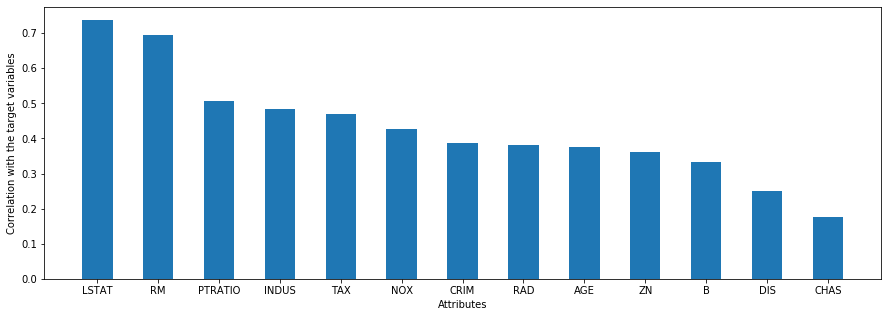

In [7]:
#Calculate correlation between every column in gthe data
corr=df.corr('pearson')

#Taking absolute values of correlation
corrs=[abs(corr[attr]['target']) for attr in list(features)]

#make a list of pairs [(corr,feature)]
l=list(zip(corrs,list(features)))

#Sort the list of pairs in reverse/ descending order
#withcorrelation values as key for sorting
l.sort(key=lambda x:x[0],reverse=True)

#Unzip the pairs to two lists
#zip(*l)-takes a list that looks like [(a,b,c),(d,e,f),(g,h,j)]
#and returns [(a,d,g),(b,e,h),(c,f,j)]
corrs,labels=list(zip((*l)))

# plot the correlations wrt the targets variables on the bar graph
index= np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variables')
plt.xticks(index,labels)
plt.show()


In [8]:
X=df['LSTAT'].values
Y=df['target'].values


In [9]:
#before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [10]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]


In [11]:
# After normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [12]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)


In [13]:
# 0.2 represents that 20% of the data is randomly sampled as testing
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)


In [14]:
def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c


In [15]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range (iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print("error less than the threshold. Stopping the gradient descent")
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values


In [16]:
%%time
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001


m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)


Wall time: 206 ms


In [17]:
mc_values_anim=mc_values[0:250:5]
mc_values_anim


[(0.8781968992516979, 0.10125713392200154),
 (0.6592677257117389, 0.1816358123018966),
 (0.46696028330134426, 0.24122222995109827),
 (0.3007298496338172, 0.2927284527220762),
 (0.15704042466265108, 0.3372503815183445),
 (0.0328354256573299, 0.37573509340973904),
 (-0.07452725451908185, 0.4090012408882324),
 (-0.16733145070259178, 0.4377564663705966),
 (-0.24755130750120813, 0.46261245527271333),
 (-0.31689327359146524, 0.48409794787234744),
 (-0.3768324015474416, 0.5026699867506567),
 (-0.4286437253776107, 0.5187236390696778),
 (-0.4734293832371356, 0.5326004004995181),
 (-0.5121420622739623, 0.5445954595648337),
 (-0.545605264330949, 0.5549639769388525),
 (-0.5745308235990506, 0.5639265132590102),
 (-0.5995340488596699, 0.5716737209255015),
 (-0.6211468124241994, 0.5783703996873774),
 (-0.6398288642006147, 0.5841590022872184),
 (-0.6559776115616165, 0.5891626647369758),
 (-0.6699365730531314, 0.5934878256854574),
 (-0.6820026857717036, 0.597226490597032),
 (-0.6924326218543979, 0.6004

In [1]:
fig,ax=plt.subplots()
ln,= plt.plot([],[],'ro-',animated=True)

def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,


def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m* -.5+c
    x2,y2=1.5,m*1.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,


anim=FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)
HTML(anim.to_html5_video()) 


NameError: name 'plt' is not defined

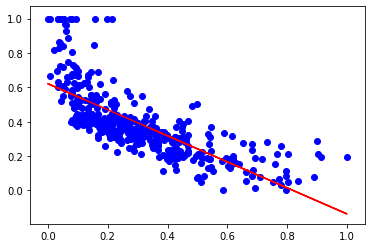

In [20]:
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')


Text(0.5, 0, 'Iterations')

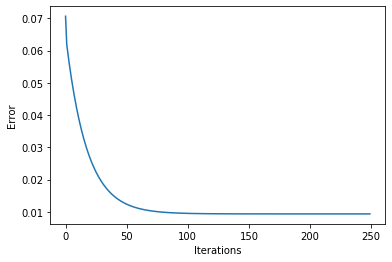

In [21]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')


In [22]:
predicted=(m*xtest)+c

In [23]:
mean_squared_error(ytest,predicted)

0.020285067451442575

In [24]:
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.067053,0.624444,0.569890
1,0.243653,0.300000,0.436069
2,0.091060,0.580000,0.551699
3,0.264625,0.384444,0.420178
4,0.423841,0.304444,0.299530


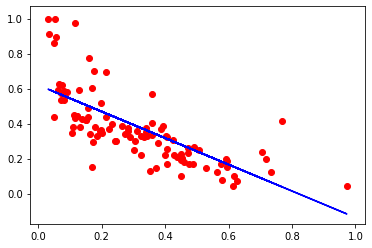

In [25]:
plt.scatter(xtest,ytest,color='r')
plt.plot(xtest,predicted,color='b')


In [26]:
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()


,x,target_y,predicted_y
0,[0.06705298013245034],[0.6244444444444445],[0.5698901670400989]
1,[0.24365342163355408],[0.30000000000000004],[0.43606907816065354]
2,[0.09105960264900662],[0.58],[0.5516988627705492]
3,[0.26462472406181015],[0.3844444444444445],[0.42017782385621943]
4,[0.423841059602649],[0.30444444444444446],[0.29952974841334457]
